# **CONFLICTO UCRANIA-RUSIA**

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

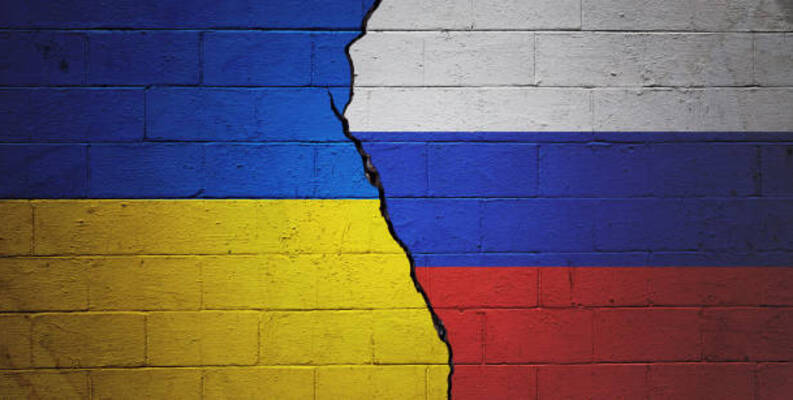

# ELECCIÓN Y JUSTIFICACIÓN DEL CONJUNTO DE DATOS.

Se ha elegido esta base de datos porque tiene un número elevado de registros y columnas y estudia un tema que lleva gestándose desde hace tiempo, como es el conflicto geopolítico entre Ucrania y Rusia y que ha derivado en una guerra que dura ya casi dos años. Esta guerra podría haber terminado siendo la 3ª Guerra Mundial. Este conjunto de datos contiene información sobre el actual conflicto entre Ucrania y Rusia de 2018 a 2023.

La base de datos seleccionada está formada por 96.082 registros y 31 columnas o variables. El tamaño de la base de datos es de 42 MB.

La complejidad de los datos es alta debido a la dimensionalidad, variedad de tipos de datos, interacciones entre variables, inconsistencias potenciales, temporalidad, geolocalización, y consideraciones semánticas y éticas. Para abordar esta complejidad habrá que implementar técnicas de limpieza de datos, estandarización, análisis y visualización de datos para facilitar la interpretación.


**Bibliotecas Utilizadas.**


# !pip install pandas
# !pip install requests
# !pip install matplotlib.pyplot
# !pip install seaborn



In [ ]:
!pip install requests

In [ ]:
# Bibliotecas utilizadas
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns

#DESCRIPCIÓN DE LAS COLUMNAS Y LOS TIPOS DE DATOS.

La base de datos incluye diferentes tipos de datos (categóricos, numéricos, fechas, geográficos, texto). Esto aumenta la complejidad, ya que cada tipo de dato puede requerir diferentes enfoques de análisis y tratamiento.

In [ ]:
# Leer y cargar la base de datos en un dataframe
df_ukraine_conflict = pd.read_csv('/content/drive/MyDrive/UkraineRussia Conflict Dataset_2018_2023/UkraineConflict.csv')
# Guardar la base de datos en la variable df.
df = df_ukraine_conflict
# Obtener información de la base de datos.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96082 entries, 0 to 96081
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EVENT_ID_CNTY       96082 non-null  object 
 1   EVENT_DATE          96082 non-null  object 
 2   YEAR                96082 non-null  int64  
 3   TIME_PRECISION      96082 non-null  int64  
 4   DISORDER_TYPE       96082 non-null  object 
 5   EVENT_TYPE          96082 non-null  object 
 6   SUB_EVENT_TYPE      96082 non-null  object 
 7   ACTOR1              96082 non-null  object 
 8   ASSOC_ACTOR_1       6488 non-null   object 
 9   INTER1              96082 non-null  int64  
 10  ACTOR2              51829 non-null  object 
 11  ASSOC_ACTOR_2       14678 non-null  object 
 12  INTER2              96082 non-null  int64  
 13  INTERACTION         96082 non-null  int64  
 14  CIVILIAN_TARGETING  4188 non-null   object 
 15  ISO                 96082 non-null  int64  
 16  REGI

La descripción de lo que representa cada columna se explica a continuación:



**Columna 0: EVENT_ID_CNTY:** Un identificador único para cada evento.

**Columna 1: EVENT_DATE:** Fecha del evento (formato día-mes-año).

**Columna 2: YEAR:** Año en el que ocurrió el evento.

**Columna 3: TIME_PRECISION:** Nivel de precisión temporal del evento (ej. 1 = exacto).

**Columna 4: DISORDER_TYPE:** Tipo de desorden o conflicto (violencia política, desarrollos estratégicos, etc.).

**Columna 5: EVENT_TYPE:** Tipo general de evento (ej. violencia contra civiles, protestas).

**Columna 6: SUB_EVENT_TYPE:** Subcategoría más específica del tipo de evento (ej. ataque, protesta pacífica).

**Columna 7: ACTOR1:** El principal actor involucrado en el evento (ej. fuerzas militares, manifestantes).

**Columna 8: ASSOC_ACTOR_1:** Actores asociados o aliados del primer actor.

**Columna 9: INTER1:** Tipo de actor 1 (un número que representa un grupo específico, como gobierno, rebelión, etc.).

**Columna 10: ACTOR2:** El segundo actor involucrado en el evento.

**Columna 11: ASSOC_ACTOR_2:** Actores asociados o aliados del segundo actor.

**Columna 12: INTER2:** Tipo de actor 2.

**Columna 13: INTERACTION:** Interacción entre los actores (una combinación numérica de INTER1 e INTER2).

**Columna 14: CIVILIAN_TARGETING:** Si los civiles fueron objetivos o no en el evento.

**Columna 15: ISO:** Código ISO del país donde ocurrió el evento.

**Columna 16: REGION:** Región donde ocurrió el evento (ej. Europa del Este).

**Columna 17: COUNTRY:** País donde ocurrió el evento.

**Columna 18: ADMIN1**: Primera división administrativa (por ejemplo, estado o provincia).

**Columna 19: ADMIN2:** Segunda división administrativa (por ejemplo, condado o distrito).

**Columna 20: ADMIN3:** Tercera división administrativa (menor detalle, si está disponible).

**Columna 21: LOCATION:** Localización específica del evento.

**Columna 22: LATITUDE:** Latitud geográfica del lugar del evento.

**Columna 23: LONGITUDE:** Longitud geográfica del lugar del evento.

**Columna 24: GEO_PRECISION:** Nivel de precisión geográfica (ej. exacto, aproximado).

**Columna 25: SOURCE:** Fuentes de donde proviene la información del evento (medios de comunicación, informes).

**Columna 26: SOURCE_SCALE:** Escala de la fuente (nacional, internacional).

**Columna 27: NOTES:** Notas descriptivas adicionales sobre el evento.

**Columna 28: FATALITIES:** Número de fallecidos en el evento.

**Columna 29: TAGS:** Etiquetas o características adicionales del evento.

**Columna 30: TIMESTAMP:** Marca de tiempo que representa el momento en que se ingresó o actualizó el evento.

In [ ]:
df.head()

,EVENT_ID_CNTY,EVENT_DATE,YEAR,TIME_PRECISION,DISORDER_TYPE,EVENT_TYPE,SUB_EVENT_TYPE,ACTOR1,ASSOC_ACTOR_1,INTER1,...,LOCATION,LATITUDE,LONGITUDE,GEO_PRECISION,SOURCE,SOURCE_SCALE,NOTES,FATALITIES,TAGS,TIMESTAMP
0,ROU448,20-May-2019,2019,1,Political violence,Violence against civilians,Attack,Police Forces of Romania (2016-2019) Coast Guard,NaN,1,...,Coast of Constanta,44.156,28.948,2,Deschide; Hurriyet Daily; News.ro; CNN; TRT Haber,National-International,"On 20 May 2019, the Coast Guard of Romania fir...",0,NaN,1649875498
1,ROU1885,28-March-2022,2022,1,Strategic developments,Strategic developments,Disrupted weapons use,Military Forces of Romania (2021-),NaN,1,...,Coast of Constanta,44.156,28.948,1,Adevarul; G4media,National,"Defusal: On 28 March 2022, Romanian minesweepe...",0,NaN,1649184809
2,ROU1940,28-July-2022,2022,1,Demonstrations,Protests,Peaceful protest,Protesters (Romania),Greenpeace,6,...,Coast of Constanta,44.156,28.948,1,News.ro,National,"On 28 July 2022, Greenpeace activists proteste...",0,crowd size=no report,1659462993
3,ROU1945,31-July-2022,2022,1,Strategic developments,Strategic developments,Disrupted weapons use,Military Forces of Romania (2021-),NaN,1,...,Coast of Constanta,44.156,28.948,1,Digi24,National,"Defusal: On 31 July 2022, Romanian Naval Force...",0,NaN,1660055880
4,ROU1947,04-August-2022,2022,1,Demonstrations,Protests,Peaceful protest,Protesters (Romania),Greenpeace,6,...,Coast of Constanta,44.156,28.948,1,News.ro,National,"On 4 August 2022, Greenpeace activists protest...",0,crowd size=no report,1660055882


# LIMPIEZA, NORMALIZACIÓN Y PREPARACIÓN DE DATOS.

In [ ]:
# Verificar la presencia de valores nulos.
df.isnull().sum()

,0
EVENT_ID_CNTY,0
EVENT_DATE,0
YEAR,0
TIME_PRECISION,0
DISORDER_TYPE,0
EVENT_TYPE,0
SUB_EVENT_TYPE,0
ACTOR1,0
ASSOC_ACTOR_1,89594
INTER1,0


NO se tienen datos de si los civiles fueron objetivo de los conflictos, ya que la columna CIVILIAN_TARGETING tiene 91.894 valores nulos de 96.082 registros que tiene la base de datos.

Se rellenan los valores nulos con un valor específico.

In [ ]:
df['ACTOR2'].fillna('Desconocido', inplace=True)
df['ASSOC_ACTOR_1'].fillna('Ninguno', inplace=True)
df['ASSOC_ACTOR_2'].fillna('Ninguno', inplace=True)
df['CIVILIAN_TARGETING'].fillna('Desconocido', inplace=True)
df['TAGS'].fillna('crowd size=no report', inplace=True)

<ipython-input-7-d264b3227a0f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ACTOR2'].fillna('Desconocido', inplace=True)
<ipython-input-7-d264b3227a0f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [ ]:
df # Comprobación del dataframe tras rellenar los valores nulos.

,EVENT_ID_CNTY,EVENT_DATE,YEAR,TIME_PRECISION,DISORDER_TYPE,EVENT_TYPE,SUB_EVENT_TYPE,ACTOR1,ASSOC_ACTOR_1,INTER1,...,LOCATION,LATITUDE,LONGITUDE,GEO_PRECISION,SOURCE,SOURCE_SCALE,NOTES,FATALITIES,TAGS,TIMESTAMP
0,ROU448,20-May-2019,2019,1,Political violence,Violence against civilians,Attack,Police Forces of Romania (2016-2019) Coast Guard,Ninguno,1,...,Coast of Constanta,44.156,28.948,2,Deschide; Hurriyet Daily; News.ro; CNN; TRT Haber,National-International,"On 20 May 2019, the Coast Guard of Romania fir...",0,crowd size=no report,1649875498
1,ROU1885,28-March-2022,2022,1,Strategic developments,Strategic developments,Disrupted weapons use,Military Forces of Romania (2021-),Ninguno,1,...,Coast of Constanta,44.156,28.948,1,Adevarul; G4media,National,"Defusal: On 28 March 2022, Romanian minesweepe...",0,crowd size=no report,1649184809
2,ROU1940,28-July-2022,2022,1,Demonstrations,Protests,Peaceful protest,Protesters (Romania),Greenpeace,6,...,Coast of Constanta,44.156,28.948,1,News.ro,National,"On 28 July 2022, Greenpeace activists proteste...",0,crowd size=no report,1659462993
3,ROU1945,31-July-2022,2022,1,Strategic developments,Strategic developments,Disrupted weapons use,Military Forces of Romania (2021-),Ninguno,1,...,Coast of Constanta,44.156,28.948,1,Digi24,National,"Defusal: On 31 July 2022, Romanian Naval Force...",0,crowd size=no report,1660055880
4,ROU1947,04-August-2022,2022,1,Demonstrations,Protests,Peaceful protest,Protesters (Romania),Greenpeace,6,...,Coast of Constanta,44.156,28.948,1,News.ro,National,"On 4 August 2022, Greenpeace activists protest...",0,crowd size=no report,1660055882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96077,UKR96344,17-March-2023,2023,1,Political violence,Explosions/Remote violence,Shelling/artillery/missile attack,Military Forces of Ukraine (2019-),Ninguno,1,...,Donetsk - Kyivskyi,47.986,37.862,1,DPR Armed Forces Press Service,Other,"On 17 March 2023, Ukrainian forces shelled DPR...",0,crowd size=no report,1679425924
96078,UKR96345,17-March-2023,2023,1,Political violence,Explosions/Remote violence,Shelling/artillery/missile attack,Military Forces of Ukraine (2019-),Ninguno,1,...,Donetsk - Petrovskyi,47.950,37.614,1,DPR Armed Forces Press Service,Other,"On 17 March 2023, Ukrainian forces shelled DPR...",2,crowd size=no report,1679425924
96079,UKR96346,17-March-2023,2023,1,Political violence,Explosions/Remote violence,Shelling/artillery/missile attack,Military Forces of Ukraine (2019-),Ninguno,1,...,Horlivka,48.313,38.042,1,DPR Armed Forces Press Service,Other,"On 17 March 2023, Ukrainian forces shelled DPR...",0,crowd size=no report,1679425924
96080,UKR96347,17-March-2023,2023,1,Political violence,Explosions/Remote violence,Shelling/artillery/missile attack,Military Forces of Ukraine (2019-),Ninguno,1,...,Yasynuvata,48.130,37.859,1,DPR Armed Forces Press Service,Other,"On 17 March 2023, Ukrainian forces shelled DPR...",0,crowd size=no report,1679425924


Verificar valores duplicados:

In [ ]:
df.duplicated().sum() # No hay valores duplicados.

0

**Se convierten los datos de la columna EVENT_DATE a tipo de dato datetime.**

In [ ]:
df['EVENT_DATE'] = pd.to_datetime(df['EVENT_DATE'], errors='coerce')

# Verificar los valores nulos que quedan.
df.isnull().sum()

,0
EVENT_ID_CNTY,0
EVENT_DATE,0
YEAR,0
TIME_PRECISION,0
DISORDER_TYPE,0
EVENT_TYPE,0
SUB_EVENT_TYPE,0
ACTOR1,0
ASSOC_ACTOR_1,0
INTER1,0


In [ ]:
df.dtypes # Verificar los tipos de datos actualizados

,0
EVENT_ID_CNTY,object
EVENT_DATE,datetime64[ns]
YEAR,int64
TIME_PRECISION,int64
DISORDER_TYPE,object
EVENT_TYPE,object
SUB_EVENT_TYPE,object
ACTOR1,object
ASSOC_ACTOR_1,object
INTER1,int64


In [ ]:
# Eliminar el prefijo 'crowd size=' de la columna 'TAGS'.
df['TAGS'] = df['TAGS'].str.replace('crowd size=', '', regex=True)

In [ ]:
df['TAGS'].unique() # Verificar que el prefijo ha desaparecido.

array(['no report', 'about 200', 'more than 100', 'more than 200',
       'about 1000', 'about 100', 'about 10', 'a few dozen',
       'several dozen', 'about 500', 'about 30-40', 'several hundred',
       'over 250', 'over 120', '30', 'about 70', 'about 36-40',
       'about 50', 'about a dozen', 'about 250', 'more than 150',
       'about 30', 'about 280', 'six', 'at least 40', 'at least 100',
       'several', 'about 600-700', 'about 1500', 'about 15', 'about 80',
       'more than 30', 'about 10,000', 'about 400', 'hundreds',
       '2500 to 7000', 'about 60', '200 to 400', 'about seven', 'eight',
       'seven', 'about 80-100', '25', 'about 30-50', 'over 100',
       'about 300', 'about 20', 'about 70-100', '3,000 to 10,000',
       'over 300', 'around 300', 'about 150', 'women targeted: girls',
       'about 120', 'about 40', 'around 25', 'at least 225', 'about 160',
       'about 450', 'five', 'about 5-7', 'about 25', '260',
       'about 1015-1020', 'about 95', 'dozens', 'at le

In [ ]:
# Eliminar la columna GEO_PRECISION porque no aporta datos necesarios para posteriores análisis geográficos.
df.drop(columns=['GEO_PRECISION'], inplace=True)

In [ ]:
df.head() # Comprobación de que la columna GEO_PRECISION.

,EVENT_ID_CNTY,EVENT_DATE,YEAR,TIME_PRECISION,DISORDER_TYPE,EVENT_TYPE,SUB_EVENT_TYPE,ACTOR1,ASSOC_ACTOR_1,INTER1,...,ADMIN3,LOCATION,LATITUDE,LONGITUDE,SOURCE,SOURCE_SCALE,NOTES,FATALITIES,TAGS,TIMESTAMP
0,ROU448,2019-05-20,2019,1,Political violence,Violence against civilians,Attack,Police Forces of Romania (2016-2019) Coast Guard,Ninguno,1,...,NaN,Coast of Constanta,44.156,28.948,Deschide; Hurriyet Daily; News.ro; CNN; TRT Haber,National-International,"On 20 May 2019, the Coast Guard of Romania fir...",0,no report,1649875498
1,ROU1885,2022-03-28,2022,1,Strategic developments,Strategic developments,Disrupted weapons use,Military Forces of Romania (2021-),Ninguno,1,...,NaN,Coast of Constanta,44.156,28.948,Adevarul; G4media,National,"Defusal: On 28 March 2022, Romanian minesweepe...",0,no report,1649184809
2,ROU1940,2022-07-28,2022,1,Demonstrations,Protests,Peaceful protest,Protesters (Romania),Greenpeace,6,...,NaN,Coast of Constanta,44.156,28.948,News.ro,National,"On 28 July 2022, Greenpeace activists proteste...",0,no report,1659462993
3,ROU1945,2022-07-31,2022,1,Strategic developments,Strategic developments,Disrupted weapons use,Military Forces of Romania (2021-),Ninguno,1,...,NaN,Coast of Constanta,44.156,28.948,Digi24,National,"Defusal: On 31 July 2022, Romanian Naval Force...",0,no report,1660055880
4,ROU1947,2022-08-04,2022,1,Demonstrations,Protests,Peaceful protest,Protesters (Romania),Greenpeace,6,...,NaN,Coast of Constanta,44.156,28.948,News.ro,National,"On 4 August 2022, Greenpeace activists protest...",0,no report,1660055882


# **TRANSFORMACIÓN Y ANÁLISIS**

In [ ]:
# Se combina las columnas de ADMIN1, ADMIN2 y ADMIN3 en una columna nueva ADMIN.
df['ADMIN'] = df['ADMIN1'] + ', ' + df['ADMIN2'] + ', ' + df['ADMIN3']

# str.replace(', ,', ',') dos comas seguidas (', ,') las reemplaza por una sola coma (',').
# str.stip(', '): elimina cualquier coma o espacio que se encuentre al principio o al final del texto en la celda.
df['ADMIN'] = df['ADMIN'].str.replace(', ,', ',').str.strip(', ')

# Reemplazar los valores nulos de ADMIN por Desconocido.
df['ADMIN'].fillna('Desconocido', inplace=True)


<ipython-input-16-2e9687f72203>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ADMIN'].fillna('Desconocido', inplace=True)


In [ ]:
# Eliminar las columnas ADMIN1, ADMIN2 y ADMIN3.
df.drop(columns=['ADMIN1', 'ADMIN2', 'ADMIN3'], inplace=True)

# Verificar que la columna ADMIN existe.
df.columns.tolist() # Lista todas las columnas del dataframe.

['EVENT_ID_CNTY',
 'EVENT_DATE',
 'YEAR',
 'TIME_PRECISION',
 'DISORDER_TYPE',
 'EVENT_TYPE',
 'SUB_EVENT_TYPE',
 'ACTOR1',
 'ASSOC_ACTOR_1',
 'INTER1',
 'ACTOR2',
 'ASSOC_ACTOR_2',
 'INTER2',
 'INTERACTION',
 'CIVILIAN_TARGETING',
 'ISO',
 'REGION',
 'COUNTRY',
 'LOCATION',
 'LATITUDE',
 'LONGITUDE',
 'SOURCE',
 'SOURCE_SCALE',
 'NOTES',
 'FATALITIES',
 'TAGS',
 'TIMESTAMP',
 'ADMIN']

In [ ]:
# Seleccionar solo las columnas de tipo 'object' (texto).

# Crea una lista de todas las columnas de texto en mi DataFrame y la guarda en la variable text_columns.
text_columns = df.select_dtypes(include=['object']).columns

# Aplicar minúsculas y eliminar espacios en todas las columnas de texto.
for column in text_columns: # La variable column representa la columna actual que estamos procesando en cada iteración del bucle.
    df[column] = df[column].str.lower().str.strip() # Aplica las transformaciones de minúsculas y eliminación de espacios a la columna actual.

df[['ACTOR1', 'ACTOR2', 'TAGS']].head(20)

,ACTOR1,ACTOR2,TAGS
0,police forces of romania (2016-2019) coast guard,civilians (turkey),no report
1,military forces of romania (2021-),unidentified military forces,no report
2,protesters (romania),desconocido,no report
3,military forces of romania (2021-),unidentified armed group (international),no report
4,protesters (romania),desconocido,no report
5,unidentified military forces,military forces of romania (2021-),no report
6,military forces of romania (2021-),unidentified military forces,no report
7,military forces of romania (2021-),military forces of russia (2000-),no report
8,military forces of turkey (2016-),civilians (afghanistan),no report
9,military forces of turkey (2016-),civilians (international),no report


# **SEGMENTACIONES O AGRUPACIONES**

In [ ]:
# Frecuencia de cada tipo de evento (por ejemplo, protestas, violencia, etc.).
df.groupby('EVENT_TYPE').size()

,0
EVENT_TYPE,
battles,29227
explosions/remote violence,57393
protests,5581
riots,420
strategic developments,2381
violence against civilians,1080


**INTEGRACIÓN DE UNA API:**

Definir la URL de la API del Banco Mundial:

http://api.worldbank.org/v2/country/{country_code}/indicator/{indicator_code}?format=json


In [ ]:
# Definir la URL de la API del Banco Mundial para obtener la población de Ucrania de 2018 a 2023.

url = "http://api.worldbank.org/v2/country/UA/indicator/SP.POP.TOTL?format=json&date=2018:2023"

# Hacer la solicitud a la API.
response = requests.get(url)

# Convertir la respuesta en formato JSON.
data = response.json()

# La estructura básica del JSON devuelto por la API del Banco Mundial es generalmente una lista con dos elementos: data[0] y data[1].
population_data = data[1] # data[1]: Contiene la lista de valores reales, que son los datos que interesan.

# Crear un DataFrame con los datos obtenidos.
df_population = pd.DataFrame(population_data)


# Seleccionar solo las columnas relevantes: 'date' (año) y 'value' (población total para cada año).
# y se guarda en el Dataframe creado en la linea anterior del código (df_population).
df_population = df_population[['date', 'value']]

# Cambiar el nombre de las columnas para mayor claridad.
df_population.columns = ['Año', 'Población']

# Convertir los años de df_population a enteros al comprobar que son de tipo objeto.
df_population['Año'] = df_population['Año'].astype(int)


# Mostrar los registros descargados de la API.
df_population

,Año,Población
0,2023,37000000
1,2022,38000000
2,2021,43848986
3,2020,44207754
4,2019,44474512
5,2018,44690584


In [ ]:
df_population['Año'].unique() # Comprobación de que el formato del dataframe de población de la API es correcto.

array([2023, 2022, 2021, 2020, 2019, 2018])

In [ ]:
# Guardar el DataFrame de población en un archivo CSV.
df_population.to_csv("poblacion_ucrania.csv", index=False)

**DATOS DE POBLACIÓN EN UCRANIA POR AÑO FACILITADOS POR LA API.**

<ipython-input-23-6520e6522ed5>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_population, x='Año', y='Población', palette=color_poblac)
<ipython-input-23-6520e6522ed5>:7: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.barplot(data=df_population, x='Año', y='Población', palette=color_poblac)


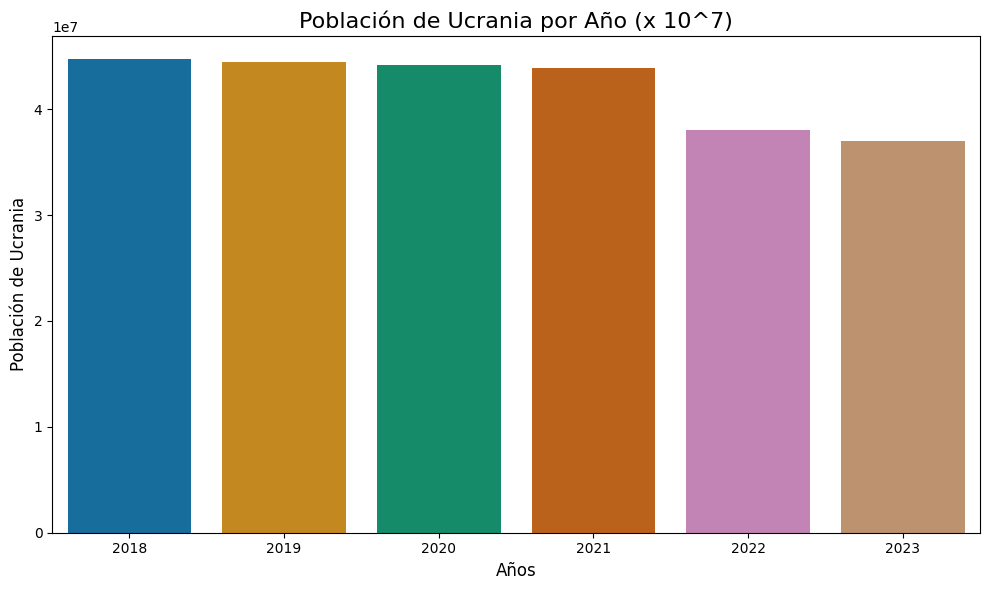

In [ ]:
# Paleta de colores personalizada.
color_poblac = sns.color_palette("colorblind", as_cmap=False)

# Crear el gráfico.
plt.figure(figsize=(10, 6))

sns.barplot(data=df_population, x='Año', y='Población', palette=color_poblac)

# Añadir etiquetas y título.
plt.title('Población de Ucrania por Año (x 10^7)', fontsize=16)
plt.xlabel('Años', fontsize=12)
plt.ylabel('Población de Ucrania', fontsize=12)

# Asegurar que los elementos del gráfico no se solapen.
plt.tight_layout()

# Guardar el gráfico.
plt.savefig('Poblacion de Ucrania por Año.png')

# Mostrar el gráfico.
plt.show()

# **ESTUDIO DE FALLECIMIENTOS EN UCRANIA**

**MEDIA DE FALLECIMIENTOS POR AÑO**

In [ ]:
# Estudio de la media de fallecimientos en Ucrania por año para relacionarlos con los resultados de la API (EN PROCESO)

# Se filtra por país.
df_ucrania = df[df['COUNTRY'] == 'ukraine'].reset_index()

In [ ]:
# Se agrupa por año y se calcula la media de los fallecidos.
df_media_fallec_año = df_ucrania.groupby('YEAR')['FATALITIES'].mean().reset_index() # reset_index() convierte la serie df_ucrania en un dataframe

df_media_fallec_año.columns = ['YEAR', 'MEDIA_FALLECIMIENTOS']  # Renombrar las columnas por claridad
df_media_fallec_año

,YEAR,MEDIA_FALLECIMIENTOS
0,2018,0.058258
1,2019,0.024342
2,2020,0.011372
3,2021,0.017285
4,2022,0.872951
5,2023,0.987434


<ipython-input-26-ab393f56f629>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_media_fallec_año, x='YEAR', y='MEDIA_FALLECIMIENTOS', palette=paleta)
<ipython-input-26-ab393f56f629>:7: UserWarning: The palette list has more values (12) than needed (6), which may not be intended.
  sns.barplot(data=df_media_fallec_año, x='YEAR', y='MEDIA_FALLECIMIENTOS', palette=paleta)


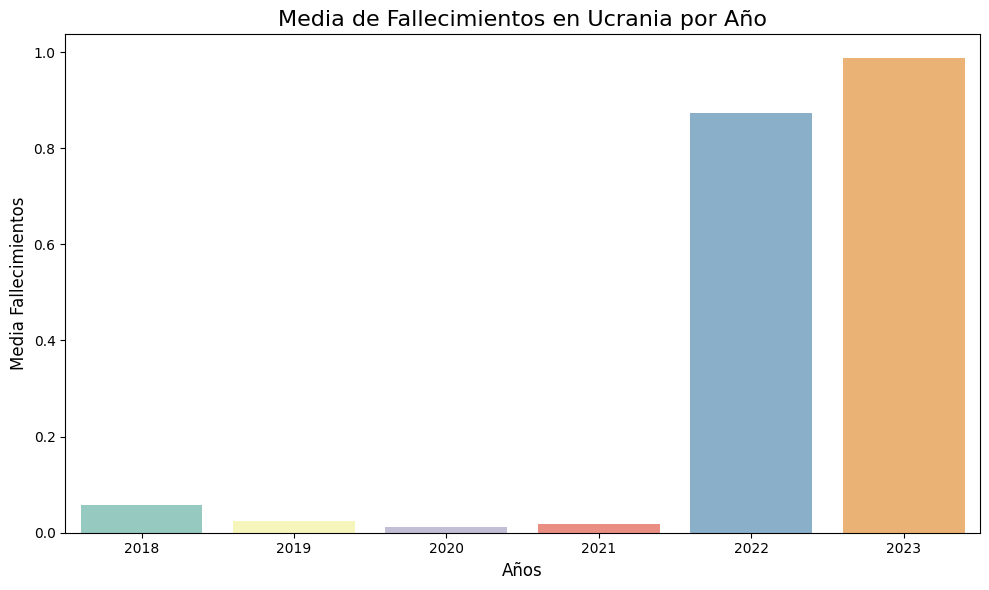

In [ ]:
# Paleta de colores personalizada
paleta = sns.color_palette("Set3", as_cmap=False)

# Crear el gráfico
plt.figure(figsize=(10, 6))

sns.barplot(data=df_media_fallec_año, x='YEAR', y='MEDIA_FALLECIMIENTOS', palette=paleta)

# Añadir etiquetas y título
plt.title('Media de Fallecimientos en Ucrania por Año', fontsize=16)
plt.xlabel('Años', fontsize=12)
plt.ylabel('Media Fallecimientos', fontsize=12)

# Asegurar que los elementos del gráfico no se solapen
plt.tight_layout()

# Guardar el gráfico.
plt.savefig('Media de Fallecimientos en Ucrania por Año.png')

# Mostrar el gráfico
plt.show()

**MEDIA DE FALLECIMIENTOS POR TIPO DE CONFLICTO.**

In [ ]:
# El dataframe filtrado previamente se agrupa por tipo de conflicto y se calcula la media de los fallecidos.
df_media_fallec_conflicto = df_ucrania.groupby('EVENT_TYPE')['FATALITIES'].mean().reset_index()

# Renombrar las columnas por claridad.
df_media_fallec_conflicto.columns = ['TIPO_CONFLICTO', 'MEDIA_FALLECIMIENTOS']

In [ ]:
# Crea un diccionario para traducir los nombres de los tipos de conflicto del inglés al español.
nombres_conflictos = {'battles': 'combates', 'explosions/remote violence': 'explosiones/violencia remota',
                      'protests': 'protestas', 'riots': 'disturbios', 'strategic developments': 'avances estratégicos',
                      'violence against civilians': 'violencia contra civiles'}

In [ ]:
# Reemplaza los valores en inglés por los de español en la columna TIPO_CONFLICTO.
df_media_fallec_conflicto['TIPO_CONFLICTO'] = df_media_fallec_conflicto['TIPO_CONFLICTO'].replace(nombres_conflictos)

<ipython-input-30-68cc33ec90db>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_media_fallec_conflicto, x='TIPO_CONFLICTO', y='MEDIA_FALLECIMIENTOS', palette=paleta)
<ipython-input-30-68cc33ec90db>:9: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.barplot(data=df_media_fallec_conflicto, x='TIPO_CONFLICTO', y='MEDIA_FALLECIMIENTOS', palette=paleta)


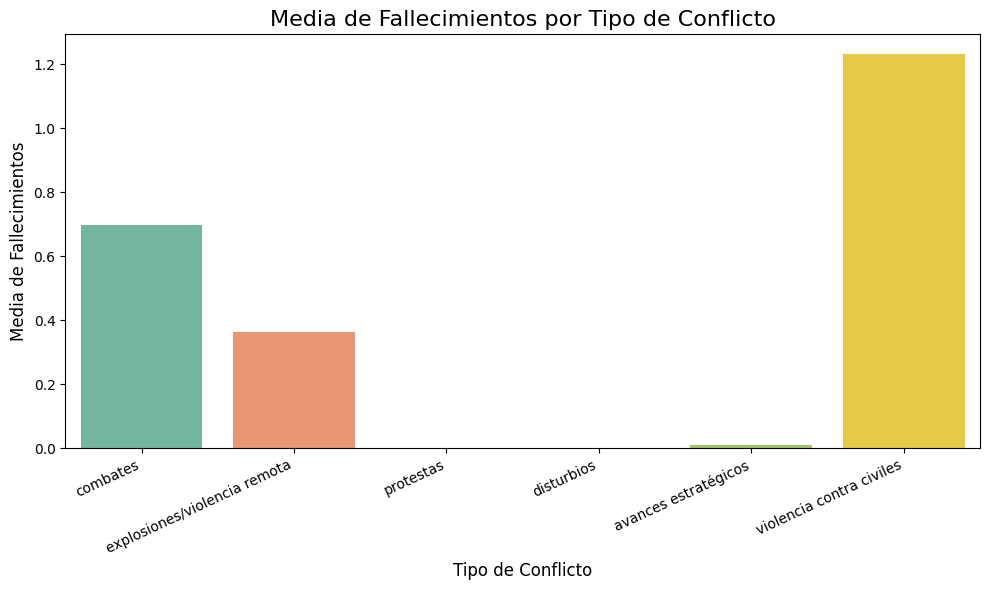

In [ ]:
# Gráfico media de fallecidos por cada tipo de hecho violento.

# Paleta de colores personalizada
paleta = sns.color_palette("Set2", as_cmap=False)

# Crear el gráfico
plt.figure(figsize=(10, 6))

sns.barplot(data=df_media_fallec_conflicto, x='TIPO_CONFLICTO', y='MEDIA_FALLECIMIENTOS', palette=paleta)

# Añadir etiquetas y título
plt.title('Media de Fallecimientos por Tipo de Conflicto', fontsize=16)
plt.xlabel('Tipo de Conflicto', fontsize=12)
plt.ylabel('Media de Fallecimientos', fontsize=12)

# Rotar las etiquetas del eje X para mejor legibilidad
plt.xticks(rotation=25, ha='right')
plt.tight_layout()

# Guardar el gráfico.
plt.savefig('Fallecimientos por Tipo de Conflicto.png')

# Mostrar el gráfico
plt.show()


**COMPARATIVA POBLACIÓN-FALLECIMIENTOS (2018-2023)**

In [ ]:
# Ordenar por 'Año' en sentido ascendente y resetear el índice de df_population.
df_population = df_population.sort_values(by='Año', ascending=True).reset_index(drop=True)

df_fallecimientos_año = df_ucrania.groupby('YEAR')['FATALITIES'].sum().reset_index() # Calcula los fallecidos por año y los convierte en dataframe.

df_fallecimientos_año.columns = ['Año', 'Fallecimientos'] # Renombra las columnas para mayor claridad.

# Ordenar por 'Año' en sentido ascendente y resetear el índice de df_fallecimientos_año.
df_fallecimientos_año = df_fallecimientos_año.sort_values(by='Año', ascending=True).reset_index(drop=True)

# Verificar ambos DataFrames ordenados.
print(df_population)
print(df_fallecimientos_año)

    Año  Población
0  2018   44690584
1  2019   44474512
2  2020   44207754
3  2021   43848986
4  2022   38000000
5  2023   37000000
    Año  Fallecimientos
0  2018             885
1  2019             403
2  2020             113
3  2021             149
4  2022           31682
5  2023            9351


<Figure size 1400x700 with 0 Axes>

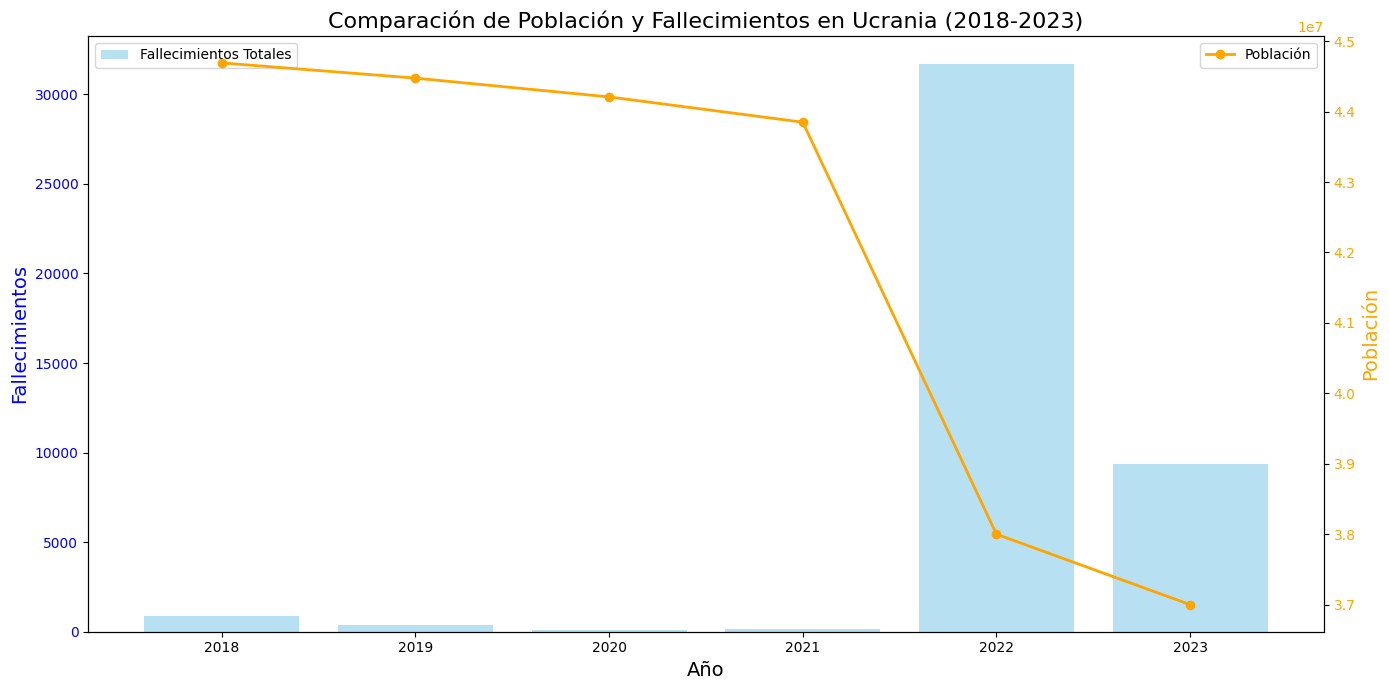

In [ ]:
# Configurar el tamaño del gráfico.
plt.figure(figsize=(14, 7))

# Se crea un eje llamado ax1.
fig, ax1 = plt.subplots(figsize=(14, 7))

# Gráfico de barras para los fallecimientos (Eje Izquierdo).
ax1.bar(df_fallecimientos_año['Año'], df_fallecimientos_año['Fallecimientos'], color='skyblue', alpha=0.6, label='Fallecimientos Totales') # Creación del gráfico de barras para los fallecimientos.
ax1.set_xlabel('Año', fontsize=14)
ax1.set_ylabel('Fallecimientos', fontsize=14, color='blue') # Pone la etiqueta del eje Y del gráfico ax1 en azul.
ax1.tick_params(axis='y', labelcolor='blue') # Pone las marcas del eje Y del gráfico ax1 en azul.

# Crear un segundo eje Y (Eje Derecho) para la población.
ax2 = ax1.twinx()  # Crea un segundo eje Y en el lado derecho compartiendo el eje X
ax2.plot(df_population['Año'], df_population['Población'], color='orange', marker='o', label='Población', linewidth=2) # Gráfico de líneas para la población.

# Asignación de etiquetas y colores para el segundo eje Y.
ax2.set_ylabel('Población', fontsize=14, color='orange') # Pone la etiqueta del eje Y del gráfico ax2 en naranja.
ax2.tick_params(axis='y', labelcolor='orange') # Pone las marcas del eje Y del gráfico ax2 en naranja.

# Título y etiquetas.
plt.title('Comparación de Población y Fallecimientos en Ucrania (2018-2023)', fontsize=16)

# Añadir leyendas en la parte superior izquierda para fallecidos y en la superior derecha para la población.
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Ajustar el diseño.
plt.tight_layout()

# Guardar el gráfico.
plt.savefig('Comparación de Población y Fallecimientos en Ucrania (2018-2023).png')

# Mostrar el gráfico.
plt.show()


**FALLECIMIENTOS PROVOCADOS POR LOS ACTORES PRINCIPALES (ACTOR1)**

In [ ]:
# Agrupar por actor principal y sumar los fallecimientos.
df_fallecimientos_actor = df.groupby('ACTOR1')['FATALITIES'].sum().reset_index()

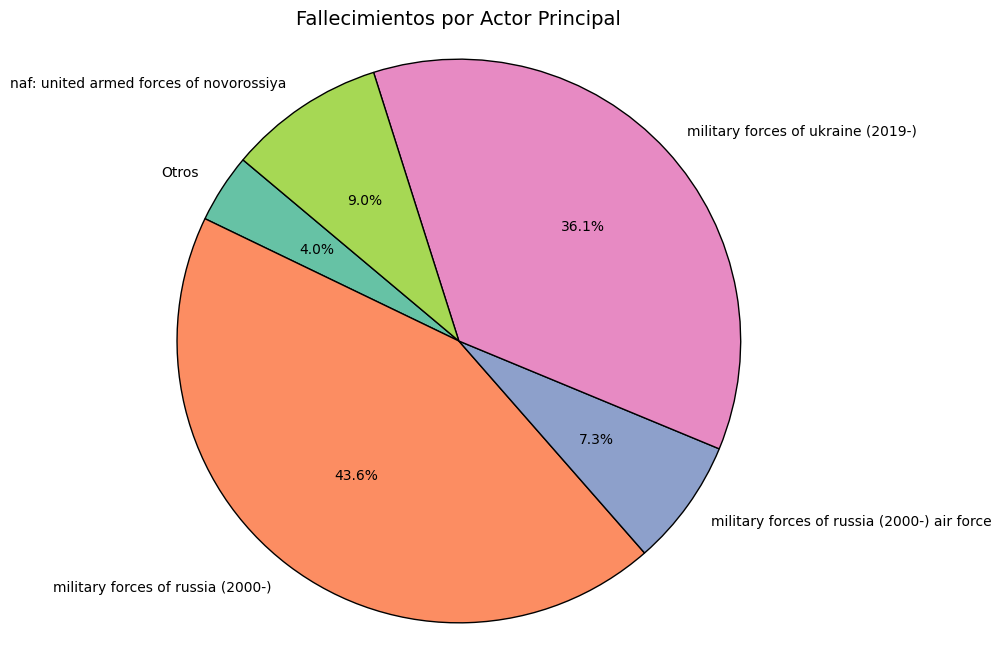

In [ ]:
# Calcula el total de fallecimientos.
total_fallecimientos = df_fallecimientos_actor['FATALITIES'].sum()
# Calcular el porcentaje de fallecimientos por actor y se guarda en la nueva columna PERCENTAGE.
df_fallecimientos_actor['PERCENTAGE'] = (df_fallecimientos_actor['FATALITIES'] / total_fallecimientos) * 100

# Establecer un umbral mínimo (por ejemplo, 2%) y agrupar los actores con menos porcentaje en "Otros".
threshold = 2

# df_fallecimientos_actor['PERCENTAGE'] < threshold devuelve True o False.
# A todas las filas que cumplen la condición, el código les asigna el valor 'Otros' en la columna ACTOR1.
df_fallecimientos_actor.loc[df_fallecimientos_actor['PERCENTAGE'] < threshold, 'ACTOR1'] = 'Otros'

# Agrupar nuevamente para sumar los fallecimientos de los que fueron etiquetados como "Otros".
df_fallecimientos_actor = df_fallecimientos_actor.groupby('ACTOR1')['FATALITIES'].sum().reset_index()

# Crear gráfico de pastel.
plt.figure(figsize=(8, 8))
plt.pie(df_fallecimientos_actor['FATALITIES'], # Datos numéricos que van a representarse en el gráfico.
        labels=df_fallecimientos_actor['ACTOR1'], # Las etiquetas son los nombres de los actores principales.
        autopct='%1.1f%%', # Se muestra el porcentaje con un decimal.
        startangle=140, # Las porciones desde un ángulo de 140 grados en sentido contrario a las agujas del reloj.
        colors=plt.cm.Set2.colors, # paleta de color.
        wedgeprops={'linewidth': 1, 'edgecolor': 'black'}) # Bordes de separación en negro.

# Añadir título.
plt.title('Fallecimientos por Actor Principal', fontsize=14)

# Asegurar que sea un círculo perfecto.
plt.axis('equal')

# Guardar el gráfico.

plt.savefig('Fallecimientos por Actor Principal.png', bbox_inches='tight', dpi=300)  # Para un archivo PNG bien ajustado


# Mostrar gráfico.
plt.show()

# **ESTUDIO DE EXISTENCIA DE SESGO EN LOS DATOS DE SOURCE POR ACTOR2 DESCONOCIDO.**

**PORCENTAJE DE DATOS DESCONOCIDOS DE LOS ACTORES SECUNDARIOS POR TIPO DE CONFLICTO.**

In [ ]:
# Esto muestra cuántas veces aparece "Desconocido" junto con otros valores en ACTOR2.
df['ACTOR2'].value_counts()

,count
ACTOR2,
desconocido,44253
naf: united armed forces of novorossiya,19387
military forces of ukraine (2019-),14713
military forces of ukraine (2014-2019),8045
civilians (ukraine),4542
...,...
civilians (vietnam),1
civilians (democratic republic of congo),1
patriots - for life,1


In [ ]:
# Crea una columna "ACTOR2_AUSENTE": tendrá un 1 si en la columna "ACTOR2" de la misma fila aparece el valor 'desconocido' y un 0 si aparece cualquier otro valor.
df['ACTOR2_AUSENTE'] = (df['ACTOR2'] == 'desconocido').astype(int)

# Dentro de cada grupo de EVENT_TYPE, se calcula la media de la columna ACTOR2_AUSENTE. Esto da el porcentaje de eventos donde ACTOR2 es "Desconocido" para cada tipo de evento.
df_analisis_actor2 = df.groupby('EVENT_TYPE')['ACTOR2_AUSENTE'].mean().reset_index()

# Renombrar las columnas por claridad.
df_analisis_actor2.columns = ['TIPO_CONFLICTO', 'ACTOR2_AUSENTE']

# Como la media da un valor entre 0 y 1, se multiplica por 100 para obtener un porcentaje y se guarda en una nueva columna: PORCENTAJE_AUSENCIA_ACTOR2.
df_analisis_actor2['PORCENTAJE_AUSENCIA_ACTOR2'] = df_analisis_actor2['ACTOR2_AUSENTE'] * 100

# Se ordenan los resultados para que los tipos de evento con mayor porcentaje de "Desconocido" en ACTOR2 aparezcan primero.
df_analisis_actor2 = df_analisis_actor2.sort_values(by='PORCENTAJE_AUSENCIA_ACTOR2', ascending=False)



In [ ]:
# Reemplaza los valores en inglés por los de español en la columna TIPO_CONFLICTO.
df_analisis_actor2['TIPO_CONFLICTO'] =df_analisis_actor2['TIPO_CONFLICTO'].replace(nombres_conflictos)

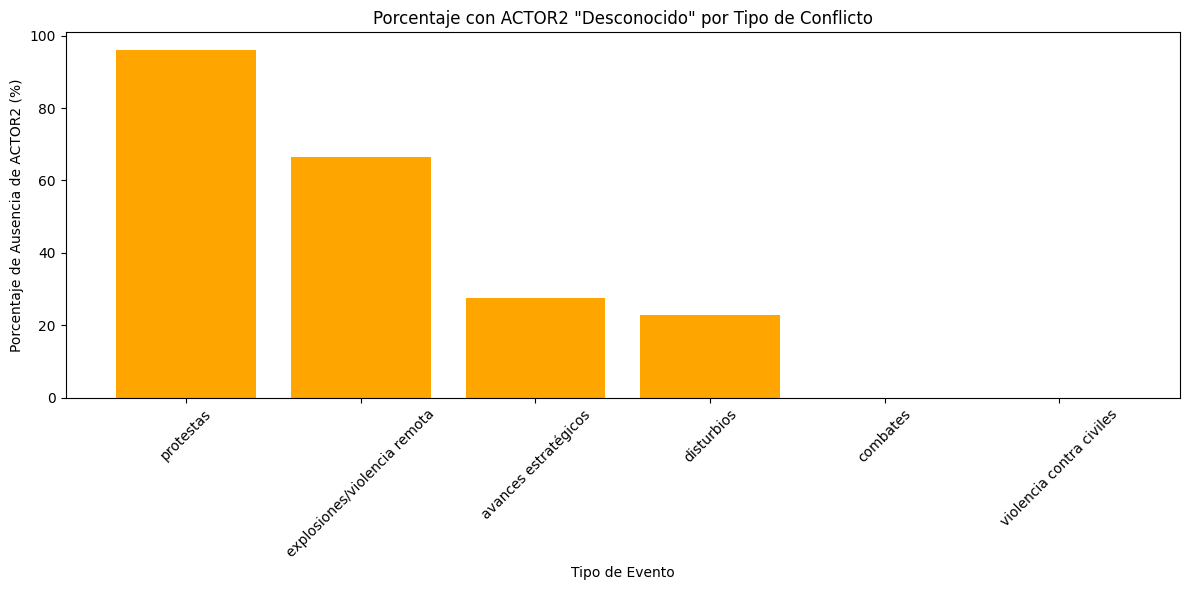

In [ ]:
# Crear el gráfico de barras.
plt.figure(figsize=(12, 6))  # Tamaño de la figura.

plt.bar(df_analisis_actor2['TIPO_CONFLICTO'], df_analisis_actor2['PORCENTAJE_AUSENCIA_ACTOR2'], color='orange')

# Agregar etiquetas y título.
plt.title('Porcentaje con ACTOR2 "Desconocido" por Tipo de Conflicto')
plt.xlabel('Tipo de Evento')
plt.ylabel('Porcentaje de Ausencia de ACTOR2 (%)')

# Rotar las etiquetas del eje x para una mejor legibilidad.
plt.xticks(rotation=45)

# Ajustar el diseño.
plt.tight_layout()

# Guardar el gráfico.
plt.savefig('Porcentaje con ACTOR2 "Desconocido" por Tipo de Conflicto.png')


# Mostrar el gráfico
plt.show()


**CUÁNTOS 'DESCONOCIDO' HAY EN ACTOR2 POR FUENTE DE INFORMACIÓN (SOURCE).**

In [ ]:
# Filtrar los datos donde ACTOR2 es "desconocido" y contar por SOURCE.
df_source_desconocido = df[df['ACTOR2'] == 'desconocido'].groupby('SOURCE').size().reset_index(name='DESCONOCIDO_POR_SOURCE')

# Contar el total de eventos por SOURCE para calcular el porcentaje.
df_source_total = df.groupby('SOURCE').size().reset_index(name='TOTAL_POR_SOURCE')

# Combinar los resultados de los dos DataFrame anteriores en uno solo ya que tienen en común la columna SOURCE.
df_source_combinado = pd.merge(df_source_desconocido, df_source_total, on='SOURCE')
df_source_combinado

,SOURCE,DESCONOCIDO_POR_SOURCE,TOTAL_POR_SOURCE
0,0312.ua; novoye vremya ukraine,1,1
1,032.ua; liveuamap; zaxid,1,1
2,061.ua,717,873
3,061.ua; 24 channel,4,7
4,061.ua; 24 channel; inform.zp.ua,1,1
...,...,...,...
1507,zmina; novoye vremya ukraine,1,2
1508,zmina; novoye vremya ukraine; tradition and order,1,1
1509,zmina; novyny,1,1
1510,zmina; ua:pershiy,1,1
